In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv("german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#Business Understanding

Goals :
It is required to group credit card customers into several groups according to customer behavior to get an effective and efficient credit card marketing strategy.

#Data Understanding

Explore Dataset

In [ ]:
print("Data dimension : ",df.shape)

Data dimension :  (1000, 11)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


Target data balancing

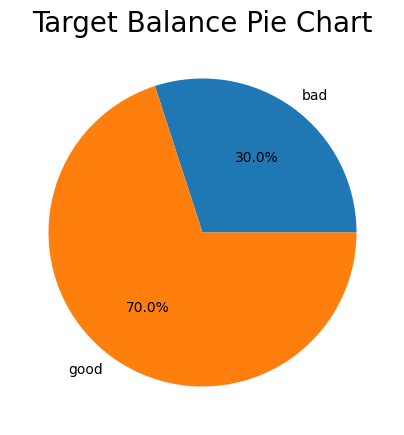

In [ ]:
val = df['Risk'].groupby(df['Risk']).count()

fig, ax = plt.subplots(figsize=(5,5))
ax.pie(labels=val.index, x=val, autopct='%.1f%%')
plt.title("Target Balance Pie Chart", size=20)
plt.show()

In [ ]:
#Statistics Descriptive
df.describe(include = "all")

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,499.500000,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,288.819436,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,249.750000,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,499.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,749.250000,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


Numeric Features Analysis

Text(0.5, 0.98, 'Histogram for Distribution Data')

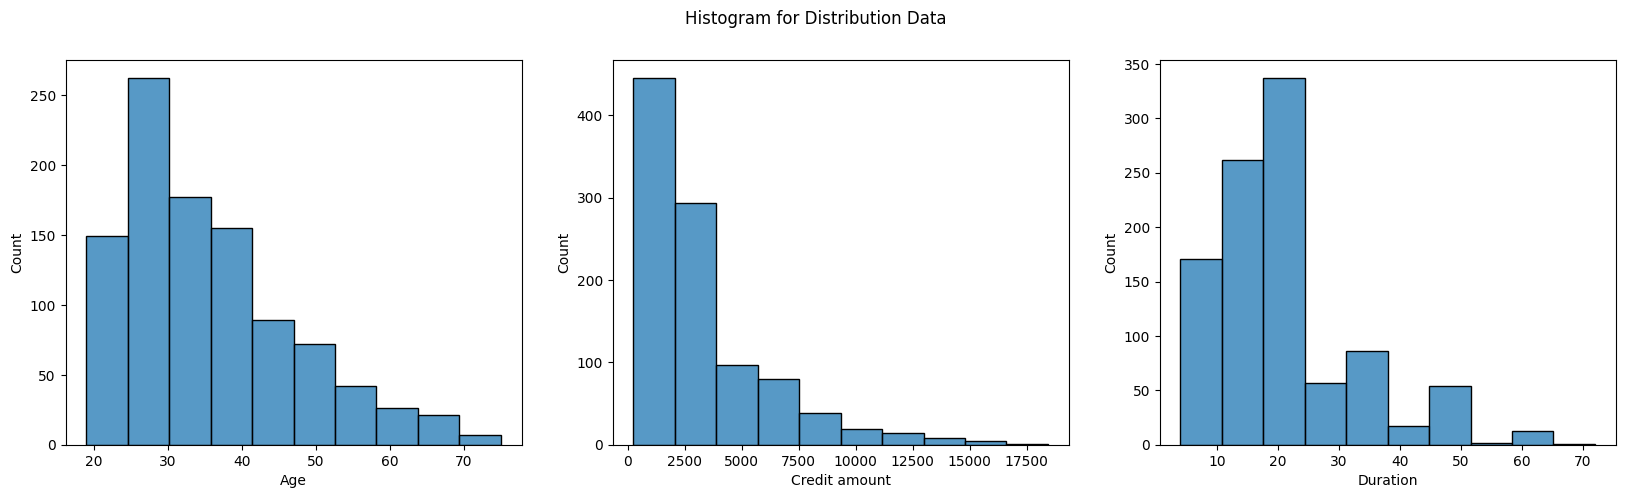

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.histplot(df, x="Age", bins=10,ax=axes[0])
sns.histplot(df, x="Credit amount", bins=10, ax=axes[1])
sns.histplot(df, x="Duration", bins=10, ax=axes[2])
plt.suptitle("Histogram for Distribution Data")

<Axes: xlabel='Duration', ylabel='Density'>

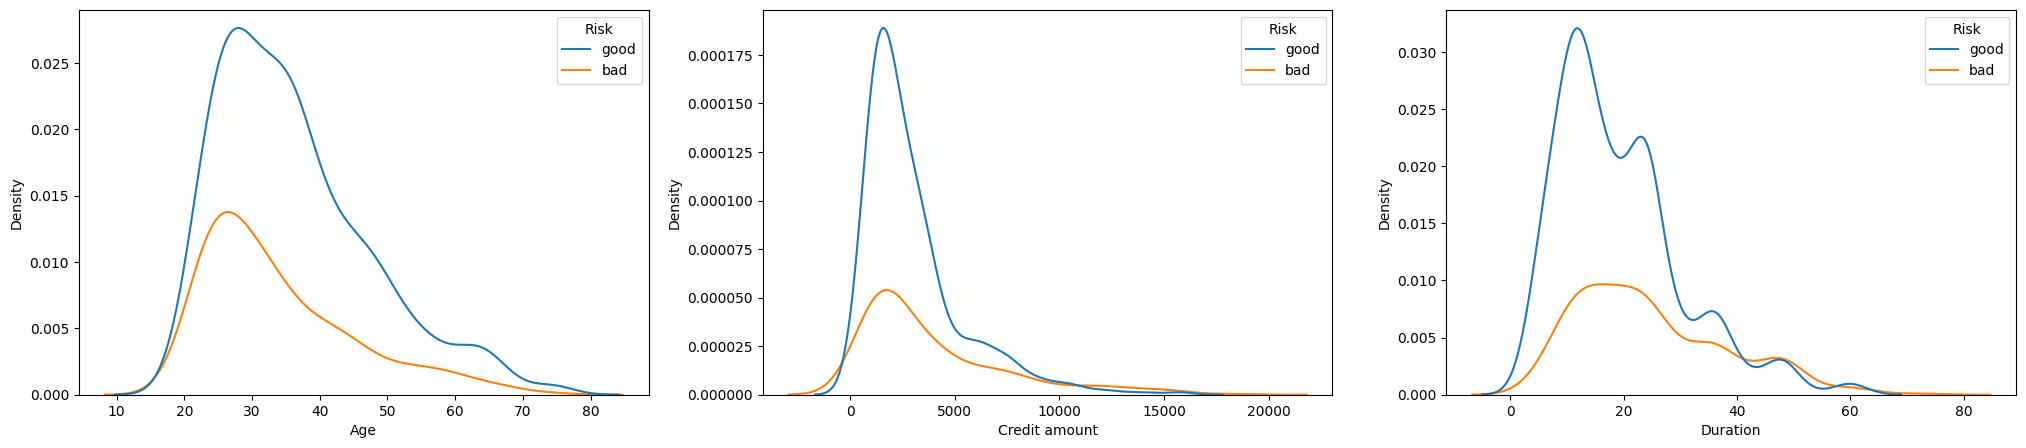

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(25,5))
sns.kdeplot(data=df, x="Age", hue="Risk", ax=axes[0])
sns.kdeplot(data=df, x="Credit amount", hue="Risk", ax=axes[1])
sns.kdeplot(data=df, x="Duration", hue="Risk", ax=axes[2])

Categorical Features Analysis

Text(0.5, 1.0, 'Risk Column')

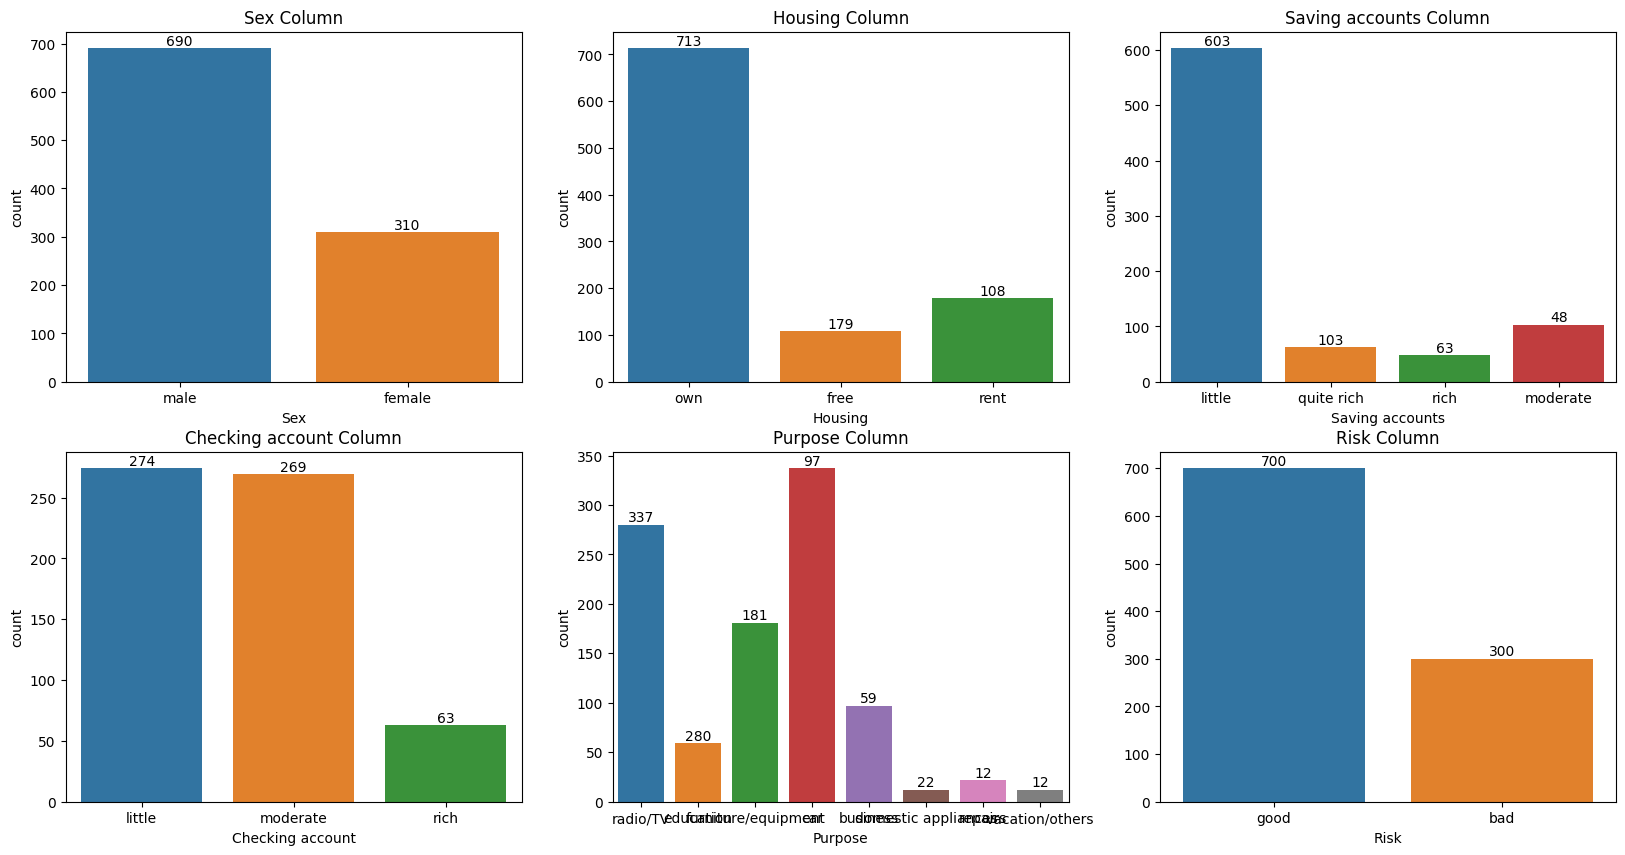

In [ ]:
#Quantity each category
fig, axes = plt.subplots(2,3, figsize=(20,10))
chart = sns.countplot(x=df['Sex'], ax=axes[0,0])
values = df['Sex'].value_counts().values
chart.bar_label(container=chart.containers[0], labels=values)
chart.set_title("Sex Column")

chart1 = sns.countplot(x=df['Housing'], ax=axes[0,1])
values1 = df['Housing'].value_counts().values
chart1.bar_label(container=chart1.containers[0], labels=values1)
chart1.set_title("Housing Column")

chart2 = sns.countplot(x=df['Saving accounts'], ax=axes[0,2])
values2 = df['Saving accounts'].value_counts().values
chart2.bar_label(container=chart2.containers[0], labels=values2)
chart2.set_title("Saving accounts Column")

chart3 = sns.countplot(x=df['Checking account'], ax=axes[1,0])
values3 = df['Checking account'].value_counts().values
chart3.bar_label(container=chart3.containers[0], labels=values3)
chart3.set_title("Checking account Column")

chart4 = sns.countplot(x=df['Purpose'], ax=axes[1,1])
values4 = df['Purpose'].value_counts().values
chart4.bar_label(container=chart4.containers[0], labels=values4)
chart4.set_title("Purpose Column")

chart5 = sns.countplot(x=df['Risk'], ax=axes[1,2])
values5 = df['Risk'].value_counts().values
chart5.bar_label(container=chart5.containers[0], labels=values5)
chart5.set_title("Risk Column")

Text(0.5, 1.0, 'Purpose Column')

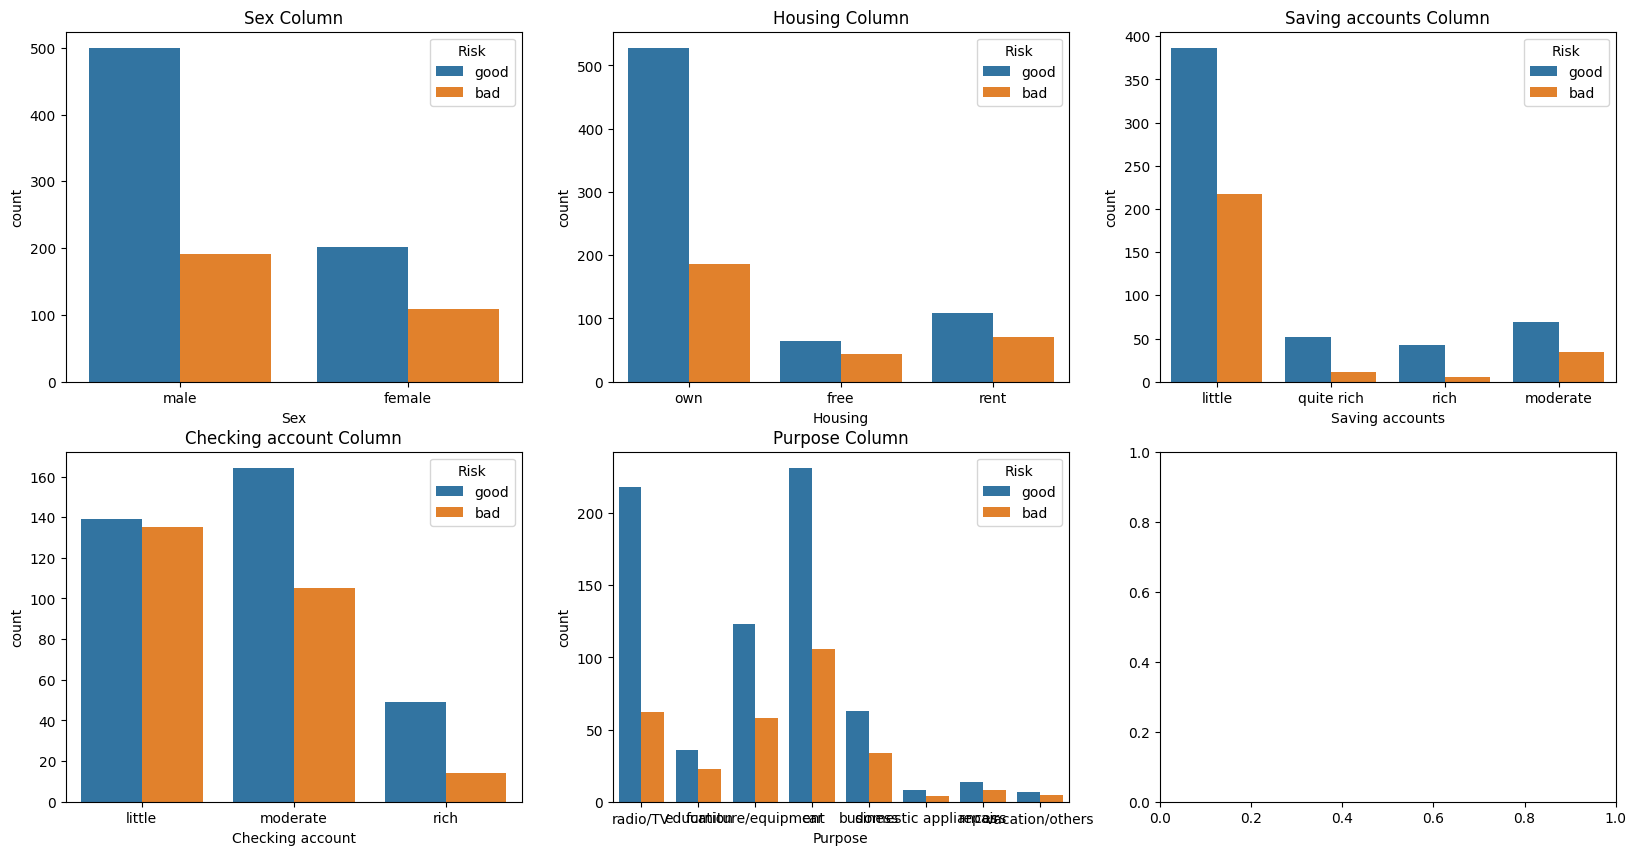

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
chart = sns.countplot(data=df, x="Sex", hue="Risk", ax=axes[0,0])
chart.set_title("Sex Column")

chart1 = sns.countplot(data=df, x="Housing", hue="Risk", ax=axes[0,1])
chart1.set_title("Housing Column")

chart2 = sns.countplot(data=df, x="Saving accounts", hue="Risk", ax=axes[0,2])
chart2.set_title("Saving accounts Column")

chart3 = sns.countplot(data=df, x="Checking account", hue="Risk", ax=axes[1,0])
chart3.set_title("Checking account Column")

chart4 = sns.countplot(data=df, x="Purpose", hue="Risk", ax=axes[1,1])
chart4.set_title("Purpose Column")

On the first look, maybe the main category that demands some attention if checking_account. If we look at those ones with little checking account and its distribution by risk, it's almost 50/50.

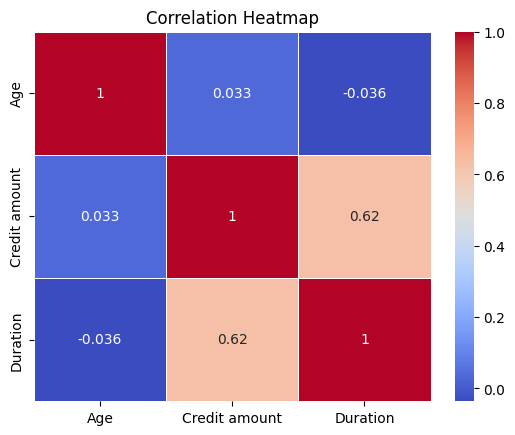

In [ ]:
#correlation between each column
corr = df[['Age', 'Credit amount', 'Duration']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#Data Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
#delete unimportant column
df = df.drop(columns="Unnamed: 0")
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


Delete missing value

In [ ]:
#check amount of missing value each column
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
#fill missing value with mode
mode_CA = df['Checking account'].mode()[0]
mode_SA = df['Saving accounts'].mode()[0]
df['Checking account'].fillna(mode_CA, inplace=True)
df['Saving accounts'].fillna(mode_SA, inplace=True)
df.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


check duplicated data

In [ ]:
duplicate = df[df.duplicated()]
duplicate.sum()

Age                 0.0
Sex                 0.0
Job                 0.0
Housing             0.0
Saving accounts     0.0
Checking account    0.0
Credit amount       0.0
Duration            0.0
Purpose             0.0
Risk                0.0
dtype: float64

outlier detection

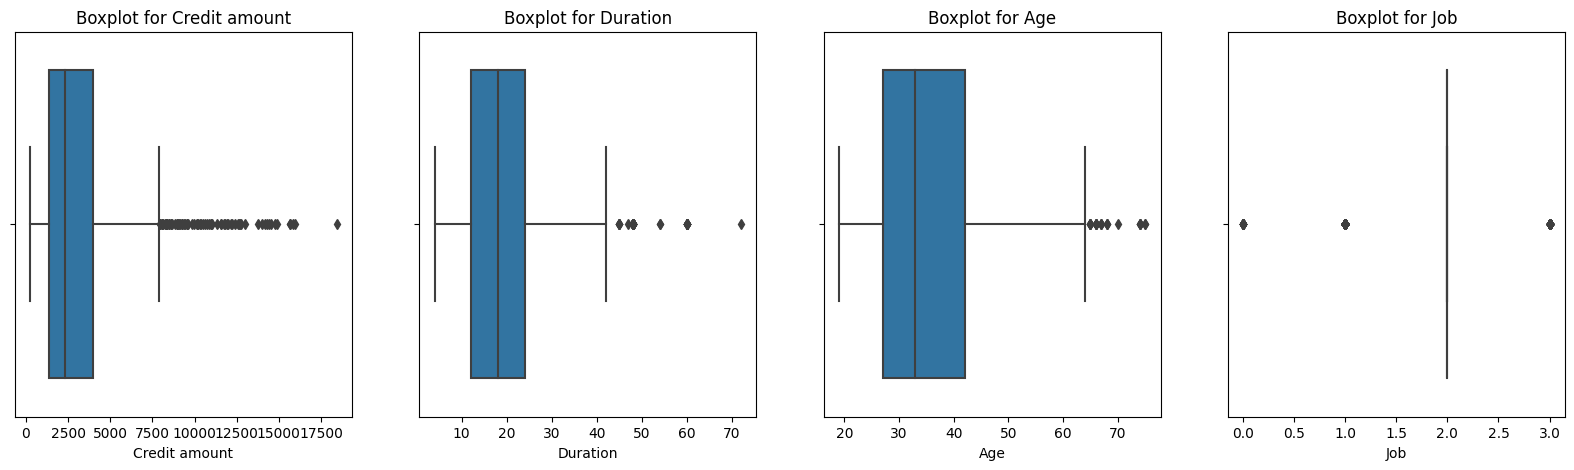

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

sns.boxplot(x='Credit amount', data=df, ax=axes[0])
axes[0].set_title('Boxplot for Credit amount')

sns.boxplot(x='Duration', data=df, ax=axes[1])
axes[1].set_title('Boxplot for Duration')

sns.boxplot(x='Age', data=df, ax=axes[2])
axes[2].set_title('Boxplot for Age')

sns.boxplot(x='Job', data=df, ax=axes[3])
axes[3].set_title('Boxplot for Job')

# Display the plots
plt.show()

In [ ]:
def detect_outlier(x):
  Q1 = x.quantile(0.25)
  Q3 = x.quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = len(df[(x < lower_bound) | (x > upper_bound)])
  return outliers

In [ ]:
print("Total outlier with IQR in Credit amount : ", detect_outlier(df['Credit amount']))
print("\nTotal outlier with IQR in Duration : ", detect_outlier(df['Duration']))
print("\nTotal outlier with IQR in Age : ", detect_outlier(df['Age']))

Total outlier with IQR in Credit amount :  72

Total outlier with IQR in Duration :  70

Total outlier with IQR in Age :  23


In [ ]:
def removing_outlier(x):
  Q1 = x.quantile(0.25)
  Q3 = x.quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  remove = df[(x >= lower_bound) & (x <= upper_bound)]
  return remove

In [ ]:
df = removing_outlier(df['Credit amount'])
df = removing_outlier(df['Age'])
df = removing_outlier(df['Duration'])
print("Number of rows after removing outlier : ",df.shape[0])

Number of rows after removing outlier :  862


In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
6,53,male,2,own,quite rich,little,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good


#label encoding

In [ ]:
df_mm = df.copy()

In [ ]:
label_encoder = LabelEncoder()
cat_col = ['Sex', 'Housing',	'Saving accounts',	'Checking account',	'Purpose']

for column in cat_col:
  df[column] = label_encoder.fit_transform(df[column])

df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
2,49,1,1,1,0,0,2096,12,3,good
3,45,1,2,0,0,0,7882,42,4,good
4,53,1,2,0,0,0,4870,24,1,bad
6,53,1,2,1,2,0,2835,24,4,good
7,35,1,3,2,0,1,6948,36,1,good


In [ ]:
#each code after label encoding
#Sex Column
print("Unique Value from Sex Column\n")
print(sorted(df_mm['Sex'].unique()))
print(sorted(df['Sex'].unique()))

#Housing column
print("\nUnique Value from Housing Column\n")
print(sorted(df_mm['Housing'].unique()))
print(sorted(df['Housing'].unique()))

#Saving account column
print("\nUnique Value from Saving accounts Column\n")
print(sorted(df_mm['Saving accounts'].unique()))
print(sorted(df['Saving accounts'].unique()))

#Checking account column
print("\nUnique Value from Checking account Column\n")
print(sorted(df_mm['Checking account'].unique()))
print(sorted(df['Checking account'].unique()))

#Purpose column
print("\nUnique Value from Purpose Column\n")
print(sorted(df_mm['Purpose'].unique()))
print(sorted(df['Purpose'].unique()))

Unique Value from Sex Column

['female', 'male']
[0, 1]

Unique Value from Housing Column

['free', 'own', 'rent']
[0, 1, 2]

Unique Value from Saving accounts Column

['little', 'moderate', 'quite rich', 'rich']
[0, 1, 2, 3]

Unique Value from Checking account Column

['little', 'moderate', 'rich']
[0, 1, 2]

Unique Value from Purpose Column

['business', 'car', 'domestic appliances', 'education', 'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others']
[0, 1, 2, 3, 4, 5, 6, 7]


#Normalization

In [ ]:
def MinMax_Scaler (df, col_names):
    features = df[col_names]
    scaler = MinMaxScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    return df

In [ ]:
X = df.copy().drop(columns='Risk')
y = df['Risk']

df_mm = MinMax_Scaler(X, X.columns)
df_mm

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
2,0.666667,1.0,0.333333,0.5,0.000000,0.0,0.241876,0.210526,0.428571
3,0.577778,1.0,0.666667,0.0,0.000000,0.0,1.000000,1.000000,0.571429
4,0.755556,1.0,0.666667,0.0,0.000000,0.0,0.605346,0.526316,0.142857
6,0.755556,1.0,0.666667,0.5,0.666667,0.0,0.338705,0.526316,0.571429
7,0.355556,1.0,1.000000,1.0,0.000000,0.5,0.877621,0.842105,0.142857
...,...,...,...,...,...,...,...,...,...
993,0.244444,1.0,1.000000,0.5,0.000000,0.0,0.485980,0.842105,0.571429
994,0.688889,1.0,0.666667,0.5,0.000000,0.0,0.280398,0.210526,0.142857
995,0.266667,0.0,0.333333,0.5,0.000000,0.0,0.194706,0.210526,0.571429
996,0.466667,1.0,1.000000,0.5,0.000000,0.0,0.472615,0.684211,0.142857


#Modelling

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Define hyperparameters to search through
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(gnb, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: {:.2f}".format(grid_search.best_score_))

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy: {:.2f}".format(accuracy))

Best Hyperparameters:  {'var_smoothing': 0.2848035868435802}
Best Score: 0.74
Test Set Accuracy: 0.73


In [ ]:
y_pred = best_model.predict(X_test)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        70
        good       0.73      1.00      0.84       189

    accuracy                           0.73       259
   macro avg       0.36      0.50      0.42       259
weighted avg       0.53      0.73      0.62       259



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
